In [2]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [3]:
# Import the requests library.
import requests

# Import the API key.
from config import weather_api_key

In [4]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + "cf971f0e9938e3c310242fc5327a8626"
print(url)

http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=cf971f0e9938e3c310242fc5327a8626


In [5]:
# Create an endpoint URL for a city.
city_url = url + "&q=" + "Boston"
print(city_url)

http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=cf971f0e9938e3c310242fc5327a8626&q=Boston


In [6]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [7]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [8]:
from citipy import citipy

In [9]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

626

In [10]:
# Import the datetime module from the datetime library.
from datetime import datetime

In [11]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

Beginning Data Retrieval     
-----------------------------


In [12]:
# Loop through all the cities in our list.
for i in range(len(cities)):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
    # Create endpoint URL with each city.
    city_url = url + "&q=" + cities[i]

In [13]:
# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    # Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Processing Record 1 of Set 13 | vila franca do campo
Processing Record 2 of Set 13 | nikolskoye
Processing Record 3 of Set 13 | rawson
Processing Record 4 of Set 13 | vostok
Processing Record 5 of Set 13 | mataura
Processing Record 6 of Set 13 | shenzhen
Processing Record 7 of Set 13 | hobart
Processing Record 8 of Set 13 | bom jardim
Processing Record 9 of Set 13 | pokhara
Processing Record 10 of Set 13 | busselton
Processing Record 11 of Set 13 | egvekinot
Processing Record 12 of Set 13 | longyearbyen
Processing Record 13 of Set 13 | nalut
Processing Record 14 of Set 13 | albany
Processing Record 15 of Set 13 | banda aceh
Processing Record 16 of Set 13 | kirakira
Processing Record 17 of Set 13 | atuona
Processing Record 18 of Set 13 | bonavista
Processing Record 19 of Set 13 | carnarvon
Processing Record 20 of Set 13 | punta arenas
Processing Record 21 of Set 13 | cabra
Processing Record 22 of Set 13 | arman
Processing Record 23 of Set 13 | rikitea
Processing Record 24 of Set 13 | ar

Processing Record 37 of Set 16 | pisco
Processing Record 38 of Set 16 | northam
Processing Record 39 of Set 16 | valley
Processing Record 40 of Set 16 | norman wells
Processing Record 41 of Set 16 | komsomolskiy
Processing Record 42 of Set 16 | husavik
Processing Record 43 of Set 16 | katsuura
Processing Record 44 of Set 16 | beringovskiy
Processing Record 45 of Set 16 | rodrigues alves
Processing Record 46 of Set 16 | changping
Processing Record 47 of Set 16 | bam
Processing Record 48 of Set 16 | sargatskoye
Processing Record 49 of Set 16 | bom jesus
Processing Record 50 of Set 16 | cabo san lucas
Processing Record 1 of Set 17 | mys shmidta
City not found. Skipping...
Processing Record 2 of Set 17 | kodiak
Processing Record 3 of Set 17 | falkoping
City not found. Skipping...
Processing Record 4 of Set 17 | hot springs
Processing Record 5 of Set 17 | malmesbury
Processing Record 6 of Set 17 | tumannyy
City not found. Skipping...
Processing Record 7 of Set 17 | bubaque
Processing Record

Processing Record 18 of Set 20 | upernavik
Processing Record 19 of Set 20 | tubruq
City not found. Skipping...
Processing Record 20 of Set 20 | chipata
Processing Record 21 of Set 20 | kungurtug
Processing Record 22 of Set 20 | killam
Processing Record 23 of Set 20 | hokitika
Processing Record 24 of Set 20 | la tuque
Processing Record 25 of Set 20 | abu dhabi
Processing Record 26 of Set 20 | ancona
Processing Record 27 of Set 20 | buariki
City not found. Skipping...
Processing Record 28 of Set 20 | okahandja
Processing Record 29 of Set 20 | suntar
Processing Record 30 of Set 20 | mokhsogollokh
Processing Record 31 of Set 20 | binzhou
Processing Record 32 of Set 20 | half moon bay
Processing Record 33 of Set 20 | bridlington
Processing Record 34 of Set 20 | maragogi
Processing Record 35 of Set 20 | lavrentiya
Processing Record 36 of Set 20 | bocas del toro
Processing Record 37 of Set 20 | balakhta
Processing Record 38 of Set 20 | suicheng
Processing Record 39 of Set 20 | nhulunbuy
Proce

Processing Record 1 of Set 24 | mindelo
Processing Record 2 of Set 24 | muros
Processing Record 3 of Set 24 | ust-tsilma
Processing Record 4 of Set 24 | zhigansk
Processing Record 5 of Set 24 | kavaratti
Processing Record 6 of Set 24 | cayenne
Processing Record 7 of Set 24 | la asuncion
Processing Record 8 of Set 24 | ballina
Processing Record 9 of Set 24 | broken hill
Processing Record 10 of Set 24 | poso
Processing Record 11 of Set 24 | mangrol
Processing Record 12 of Set 24 | salinas
Processing Record 13 of Set 24 | surt
Processing Record 14 of Set 24 | bratsk
Processing Record 15 of Set 24 | yamada
Processing Record 16 of Set 24 | severnoye
Processing Record 17 of Set 24 | soyaniquilpan
Processing Record 18 of Set 24 | ponta delgada
Processing Record 19 of Set 24 | kijang
Processing Record 20 of Set 24 | owando
Processing Record 21 of Set 24 | benjamin hill
Processing Record 22 of Set 24 | zaozhuang
Processing Record 23 of Set 24 | homer
Processing Record 24 of Set 24 | mackay
Proc

In [14]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Vila Franca Do Campo,37.7167,-25.4333,53.60,62,20,14.97,PT,2021-01-08 00:42:17
1,Nikolskoye,59.7035,30.7861,24.80,86,75,11.18,RU,2021-01-08 00:42:18
2,Rawson,-43.3002,-65.1023,60.39,53,0,10.29,AR,2021-01-08 00:40:47
3,Vostok,46.4856,135.8833,-18.76,82,100,3.71,RU,2021-01-08 00:42:18
4,Mataura,-46.1927,168.8643,62.01,72,66,4.00,NZ,2021-01-08 00:42:18
5,Shenzhen,22.5455,114.0683,48.00,71,90,1.99,CN,2021-01-08 00:38:12
6,Hobart,-42.8794,147.3294,75.99,59,20,6.91,AU,2021-01-08 00:40:08
7,Bom Jardim,-7.7958,-35.5872,72.82,84,41,5.66,BR,2021-01-08 00:42:19
8,Pokhara,28.2333,83.9833,58.15,34,93,4.74,NP,2021-01-08 00:39:01
9,Busselton,-33.6500,115.3333,86.00,31,0,4.00,AU,2021-01-08 00:42:19


In [15]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [19]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

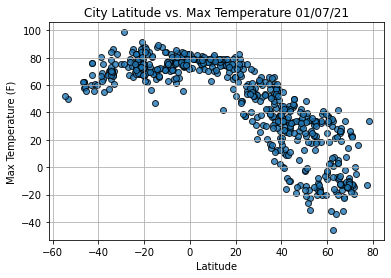

In [20]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

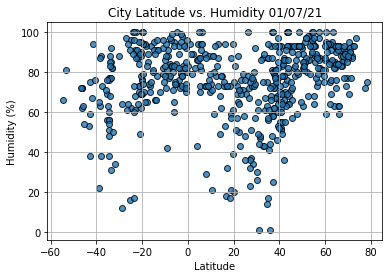

In [21]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

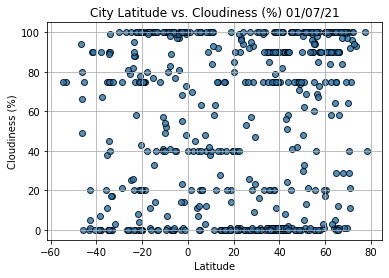

In [22]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

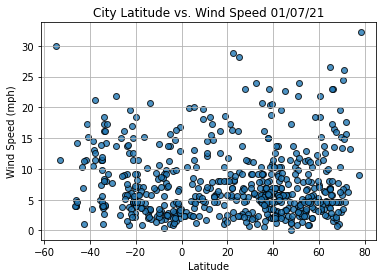

In [23]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()

In [26]:
# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.

def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates)


SyntaxError: invalid syntax (<ipython-input-26-96fa111a85c7>, line 4)

In [28]:
# Import linregress
from scipy.stats import linregress

# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):

    # Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)

    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    # Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.show()

In [29]:
city_data_df.loc[(city_data_df["Lat"] >= 0)].head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Vila Franca Do Campo,37.7167,-25.4333,53.60,62,20,14.97,PT,2021-01-08 00:42:17
1,Nikolskoye,59.7035,30.7861,24.80,86,75,11.18,RU,2021-01-08 00:42:18
3,Vostok,46.4856,135.8833,-18.76,82,100,3.71,RU,2021-01-08 00:42:18
5,Shenzhen,22.5455,114.0683,48.00,71,90,1.99,CN,2021-01-08 00:38:12
8,Pokhara,28.2333,83.9833,58.15,34,93,4.74,NP,2021-01-08 00:39:01


In [30]:
# Create Northern and Southern Hemisphere DataFrames.
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

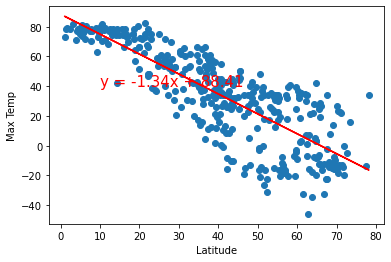

In [31]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for Maximum Temperature', 'Max Temp',(10,40))


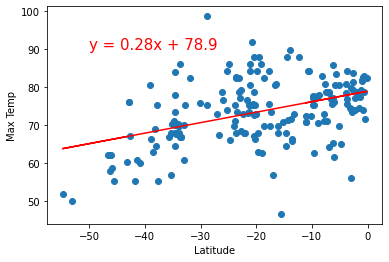

In [32]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for Maximum Temperature', 'Max Temp',(-50,90))


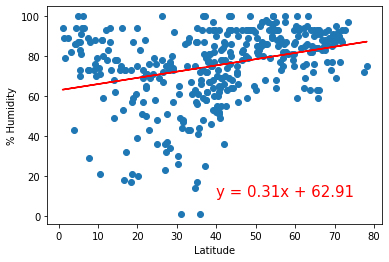

In [33]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for % Humidity', '% Humidity',(40,10))


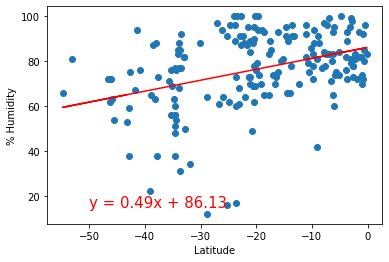

In [35]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for % Humidity', '% Humidity',(-50,15))


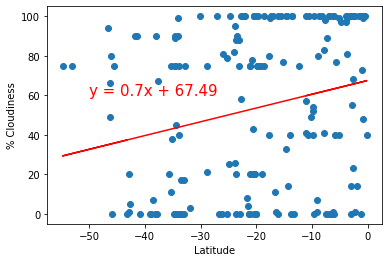

In [37]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for % Cloudiness', '% Cloudiness',(-50,60))


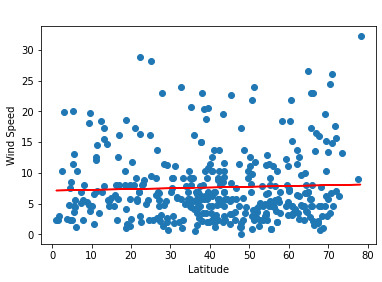

In [39]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for Wind Speed', 'Wind Speed',(40,35))

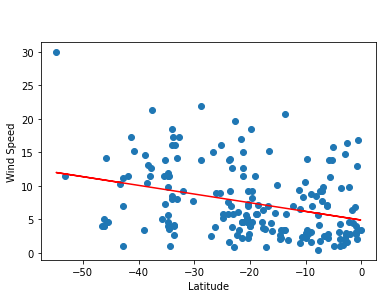

In [40]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for Wind Speed', 'Wind Speed',(-50,35))
